<a href="https://colab.research.google.com/github/kashif-kairo/Cpp-DSA/blob/main/DataAnalysisProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install requests beautifulsoup4 nltk pandas syllapy


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
import re
import os
from nltk.corpus import stopwords
import syllapy

# Ensure you have the necessary nltk data files
nltk.download('punkt')
nltk.download('stopwords')
print("Done")


Done


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
#importing data

input_df = pd.read_excel('/content/Input.xlsx')
input_df.head()


,URL_ID,URL
0,bctech2011,https://insights.blackcoffer.com/ml-and-ai-bas...
1,bctech2012,https://insights.blackcoffer.com/streamlined-i...
2,bctech2013,https://insights.blackcoffer.com/efficient-dat...
3,bctech2014,https://insights.blackcoffer.com/effective-man...
4,bctech2015,https://insights.blackcoffer.com/streamlined-t...


In [7]:
# Example stopwords list
stop_words = {
    'a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', 'aren\'t', 'as', 'at',
    'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can\'t', 'cannot', 'could',
    'couldn\'t', 'did', 'didn\'t', 'do', 'does', 'doesn\'t', 'doing', 'don\'t', 'down', 'during', 'each', 'few', 'for',
    'from', 'further', 'had', 'hadn\'t', 'has', 'hasn\'t', 'have', 'haven\'t', 'having', 'he', 'he\'d', 'he\'ll',
    'he\'s', 'her', 'here', 'here\'s', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'how\'s', 'i', 'i\'d', 'i\'ll',
    'i\'m', 'i\'ve', 'if', 'in', 'into', 'is', 'isn\'t', 'it', 'it\'s', 'its', 'itself', 'let\'s', 'me', 'more', 'most',
    'mustn\'t', 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our',
    'ours', 'ourselves', 'out', 'over', 'own', 'same', 'shan\'t', 'she', 'she\'d', 'she\'ll', 'she\'s', 'should',
    'shouldn\'t', 'so', 'some', 'such', 'than', 'that', 'that\'s', 'the', 'their', 'theirs', 'them', 'themselves',
    'then', 'there', 'there\'s', 'these', 'they', 'they\'d', 'they\'ll', 'they\'re', 'they\'ve', 'this', 'those',
    'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', 'wasn\'t', 'we', 'we\'d', 'we\'ll', 'we\'re',
    'we\'ve', 'were', 'weren\'t', 'what', 'what\'s', 'when', 'when\'s', 'where', 'where\'s', 'which', 'while', 'who',
    'who\'s', 'whom', 'why', 'why\'s', 'with', 'won\'t', 'would', 'wouldn\'t', 'you', 'you\'d', 'you\'ll', 'you\'re',
    'you\'ve', 'your', 'yours', 'yourself', 'yourselves'
}

# Example positive and negative words lists
positive_words = {'good', 'great', 'happy', 'joyful', 'excellent', 'positive', 'fortunate', 'correct', 'superior'}
negative_words = {'bad', 'worst', 'sad', 'angry', 'poor', 'negative', 'unfortunate', 'wrong', 'inferior'}

# Verify the first few stopwords and dictionary words
print("Stop Words:", list(stop_words)[:10])
print("Positive Words:", list(positive_words)[:10])
print("Negative Words:", list(negative_words)[:10])


Stop Words: ['such', 'the', 'most', "doesn't", 'any', "we'll", 'were', 'below', 'who', 'am']
Positive Words: ['happy', 'correct', 'joyful', 'excellent', 'good', 'positive', 'great', 'fortunate', 'superior']
Negative Words: ['unfortunate', 'inferior', 'poor', 'bad', 'wrong', 'negative', 'worst', 'sad', 'angry']


In [8]:
def clean_tokenize(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    tokens = nltk.word_tokenize(text)
    return [word for word in tokens if word not in stop_words]

# Example usage
sample_text = "This is a sample text to test tokenization!"
cleaned_tokens = clean_tokenize(sample_text)
print("Cleaned Tokens:", cleaned_tokens)


Cleaned Tokens: ['sample', 'text', 'test', 'tokenization']


In [9]:
def sentiment_scores(tokens):
    pos_score = sum(1 for word in tokens if word in positive_words)
    neg_score = sum(1 for word in tokens if word in negative_words)
    total_words = len(tokens)
    polarity_score = (pos_score - neg_score) / ((pos_score + neg_score) + 0.000001)
    subjectivity_score = (pos_score + neg_score) / (total_words + 0.000001)
    return pos_score, neg_score, polarity_score, subjectivity_score

# Example usage
sample_tokens = ['happy', 'sad', 'joyful', 'depressed']
pos_score, neg_score, polarity_score, subjectivity_score = sentiment_scores(sample_tokens)
print("Positive Score:", pos_score)
print("Negative Score:", neg_score)
print("Polarity Score:", polarity_score)
print("Subjectivity Score:", subjectivity_score)


Positive Score: 2
Negative Score: 1
Polarity Score: 0.33333322222225925
Subjectivity Score: 0.7499998125000469


In [10]:
def readability_metrics(text):
    sentences = nltk.sent_tokenize(text)
    words = clean_tokenize(text)
    avg_sentence_length = len(words) / len(sentences)
    complex_words_count = sum(1 for word in words if syllapy.count(word) > 2)
    percentage_complex_words = complex_words_count / len(words)
    fog_index = 0.4 * (avg_sentence_length + percentage_complex_words)
    return avg_sentence_length, percentage_complex_words, fog_index, len(sentences), complex_words_count, len(words)

# Example usage
sample_text = "This is a simple sentence. This is another sentence with more words."
metrics = readability_metrics(sample_text)
print("Readability Metrics:", metrics)


Readability Metrics: (2.5, 0.2, 1.08, 2, 1, 5)


In [11]:
def syllable_count(word):
    return syllapy.count(word)

def personal_pronouns_count(text):
    pronouns = re.findall(r'\b(I|we|my|ours|us)\b', text, re.I)
    return len(pronouns)

def avg_word_length(words):
    return sum(len(word) for word in words) / len(words)

# Example usage
sample_text = "I am testing the function with this text."
cleaned_tokens = clean_tokenize(sample_text)
syllables = sum(syllable_count(word) for word in cleaned_tokens) / len(cleaned_tokens)
pronouns = personal_pronouns_count(sample_text)
avg_length = avg_word_length(cleaned_tokens)

print("Syllables per Word:", syllables)
print("Personal Pronouns:", pronouns)
print("Average Word Length:", avg_length)


Syllables per Word: 1.3333333333333333
Personal Pronouns: 1
Average Word Length: 6.333333333333333


In [12]:
output_data = []

for _, row in input_df.iterrows():
    url_id = row['URL_ID']
    url = row['URL']

    # Extract article text
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    article_title = soup.find('h1').get_text()
    article_text = ' '.join(p.get_text() for p in soup.find_all('p'))

    # Save extracted text
    with open(f'{url_id}.txt', 'w') as file:
        file.write(article_title + '\n' + article_text)

    # Perform text analysis
    cleaned_tokens = clean_tokenize(article_text)
    pos_score, neg_score, polarity_score, subjectivity_score = sentiment_scores(cleaned_tokens)
    avg_sentence_length, perc_complex_words, fog_index, num_sentences, complex_words_count, word_count = readability_metrics(article_text)
    syllables_per_word = sum(syllable_count(word) for word in cleaned_tokens) / len(cleaned_tokens)
    personal_pronouns = personal_pronouns_count(article_text)
    avg_word_len = avg_word_length(cleaned_tokens)

    output_data.append([
        row['URL_ID'], row['URL'], pos_score, neg_score, polarity_score, subjectivity_score,
        avg_sentence_length, perc_complex_words, fog_index, avg_sentence_length,
        complex_words_count, word_count, syllables_per_word, personal_pronouns, avg_word_len
    ])

# Verify the first few rows of output data
output_data[:5]


[['bctech2011',
  'https://insights.blackcoffer.com/ml-and-ai-based-insurance-premium-model-to-predict-premium-to-be-charged-by-the-insurance-company/',
  0,
  0,
  0.0,
  0.0,
  27.458333333333332,
  0.47040971168437024,
  11.171497218007083,
  27.458333333333332,
  310,
  659,
  2.433990895295903,
  4,
  7.400606980273142],
 ['bctech2012',
  'https://insights.blackcoffer.com/streamlined-integration-interactive-brokers-api-with-python-for-desktop-trading-application/',
  0,
  0,
  0.0,
  0.0,
  28.428571428571427,
  0.4020100502512563,
  11.532232591529073,
  28.428571428571427,
  80,
  199,
  2.391959798994975,
  3,
  7.592964824120603],
 ['bctech2013',
  'https://insights.blackcoffer.com/efficient-data-integration-and-user-friendly-interface-development-navigating-challenges-in-web-application-deployment/',
  0,
  0,
  0.0,
  0.0,
  28.0,
  0.40816326530612246,
  11.36326530612245,
  28.0,
  80,
  196,
  2.3979591836734695,
  3,
  7.591836734693878],
 ['bctech2014',
  'https://insig

In [13]:
output_columns = [
    'URL_ID', 'URL', 'POSITIVE SCORE', 'NEGATIVE SCORE', 'POLARITY SCORE', 'SUBJECTIVITY SCORE',
    'AVG SENTENCE LENGTH', 'PERCENTAGE OF COMPLEX WORDS', 'FOG INDEX', 'AVG NUMBER OF WORDS PER SENTENCE',
    'COMPLEX WORD COUNT', 'WORD COUNT', 'SYLLABLE PER WORD', 'PERSONAL PRONOUNS', 'AVG WORD LENGTH'
]
output_df = pd.DataFrame(output_data, columns=output_columns)
output_df.to_csv('Output Data Structure.csv', index=False)

# Display the saved CSV file
output_df.head()


,URL_ID,URL,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX,AVG NUMBER OF WORDS PER SENTENCE,COMPLEX WORD COUNT,WORD COUNT,SYLLABLE PER WORD,PERSONAL PRONOUNS,AVG WORD LENGTH
0,bctech2011,https://insights.blackcoffer.com/ml-and-ai-bas...,0,0,0.0,0.0,27.458333,0.470410,11.171497,27.458333,310,659,2.433991,4,7.400607
1,bctech2012,https://insights.blackcoffer.com/streamlined-i...,0,0,0.0,0.0,28.428571,0.402010,11.532233,28.428571,80,199,2.391960,3,7.592965
2,bctech2013,https://insights.blackcoffer.com/efficient-dat...,0,0,0.0,0.0,28.000000,0.408163,11.363265,28.000000,80,196,2.397959,3,7.591837
3,bctech2014,https://insights.blackcoffer.com/effective-man...,0,0,0.0,0.0,28.285714,0.409091,11.477922,28.285714,81,198,2.398990,3,7.590909
4,bctech2015,https://insights.blackcoffer.com/streamlined-t...,0,0,0.0,0.0,28.428571,0.407035,11.534243,28.428571,81,199,2.396985,3,7.608040


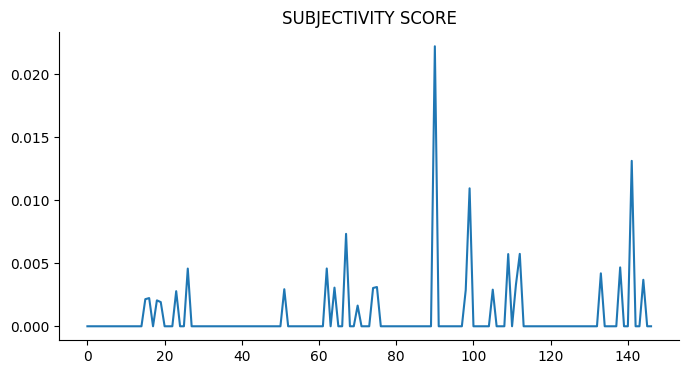

In [14]:
# @title SUBJECTIVITY SCORE

from matplotlib import pyplot as plt
output_df['SUBJECTIVITY SCORE'].plot(kind='line', figsize=(8, 4), title='SUBJECTIVITY SCORE')
plt.gca().spines[['top', 'right']].set_visible(False)